In [1]:
import os
from os.path import join as oj
import sys, time
sys.path.insert(1, oj(sys.path[0], '..'))  # insert parent path
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from copy import deepcopy
import pickle as pkl
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_validate, ShuffleSplit, train_test_split
import pandas as pd
import data_pecarn 
import data_psrc
import data
from collections import Counter
plt.style.use('dark_background')
# sns.set(style="white")
%matplotlib inline
%load_ext autoreload
%autoreload 2
NUM_PATIENTS = 12044

In [69]:
dummy = False
df_pecarn = data_pecarn.get_data(use_processed=False,
                                 frac_missing_allowed=0.1,
                                 dummy=dummy)
all_feats_pecarn, filtered_feats_pecarn = data.get_feat_names(df_pecarn)
df_psrc = data_psrc.get_data(use_processed=False, dummy=dummy)
all_feats_psrc, filtered_feats_psrc = data.get_feat_names(df_psrc)

computing pecarn preprocessing...
computing psrc preprocessing...


# still need to find all the rel vars for distracting pain

In [70]:
outcome_def = 'iai_intervention' # output
common_feats = list(filtered_feats_pecarn.intersection(filtered_feats_psrc))
common_feats = common_feats + [outcome_def, 'cv_fold', 'dset']
print(common_feats, len(common_feats))

['AbdDistention', 'Hypotension', 'LtCostalTender', 'DistractingPain', 'RecodedMOI', 'DecrBreathSound', 'Age', 'AbdTrauma_or_SeatBeltSign', 'AbdTrauma', 'GCSScore', 'AbdomenPain', 'InitSysBPRange', 'SeatBeltSign', 'VomitWretch', 'CostalTender', 'RtCostalTender', 'InitHeartRate', 'Race', 'ThoracicTrauma', 'AbdTenderDegree', 'iai_intervention', 'cv_fold', 'dset'] 23


In [71]:
for feat in common_feats:
    print(feat, df_pecarn[feat].unique(),
          df_pecarn[feat].min(), df_pecarn[feat].max())

AbdDistention ['no' 'unknown' 'yes'] no yes
Hypotension [ True False] False True
LtCostalTender [2. 1. 3. 4.] 1.0 4.0
DistractingPain ['no' 'yes' 'unknown'] no yes
RecodedMOI ['Pedestrian/bicyclist struck by moving vehicle' 'Fall from an elevation'
 'Motor vehicle collision' 'Object struck abdomen' 'Bike collision/fall'
 'Motorcycle/ATV/Scooter collision' 'unknown' 'Fall down stairs'] Bike collision/fall unknown
DecrBreathSound ['no' 'unknown' 'yes'] no yes
Age [ 6  3 13 11 16  1 15  9 17 14 12  7  8 10  2  4  0  5] 0 17
AbdTrauma_or_SeatBeltSign ['False' 'True'] False True
AbdTrauma ['no' 'yes' 'unknown'] no yes
GCSScore [15. 12.  3. 14.  7. 13. 11.  9.  8. 10.  6.  4.  5.] 3.0 15.0
AbdomenPain ['no' 'yes' 'other' 'unknown'] no yes
InitSysBPRange [ 97.  87. 120. 133. 119. 118. 154. 136. 137. 116. 148. 147. 143. 108.
 104. 111. 107. 106. 159. 121. 130.  91. 125. 126. 113. 110. 122.  99.
 142. 114. 141. 101. 109. 129. 144. 175. 138. 149. 132. 112.  92. 151.
 105. 131. 139. 135. 124.  61

**look at resulting feats**

In [72]:
filtered_feats_pecarn.intersection(filtered_feats_psrc)

{'AbdDistention',
 'AbdTenderDegree',
 'AbdTrauma',
 'AbdTrauma_or_SeatBeltSign',
 'AbdomenPain',
 'Age',
 'CostalTender',
 'DecrBreathSound',
 'DistractingPain',
 'GCSScore',
 'Hypotension',
 'InitHeartRate',
 'InitSysBPRange',
 'LtCostalTender',
 'Race',
 'RecodedMOI',
 'RtCostalTender',
 'SeatBeltSign',
 'ThoracicTrauma',
 'VomitWretch'}

In [73]:
print('psrc but not pecarn')
filtered_feats_psrc.difference(filtered_feats_pecarn)

psrc but not pecarn


{'FemurFracture'}

In [75]:
print('pecarn but not psrc')
print(filtered_feats_pecarn.difference(filtered_feats_psrc))

pecarn but not psrc
{'ThoracicTender'}


# look for feat shift

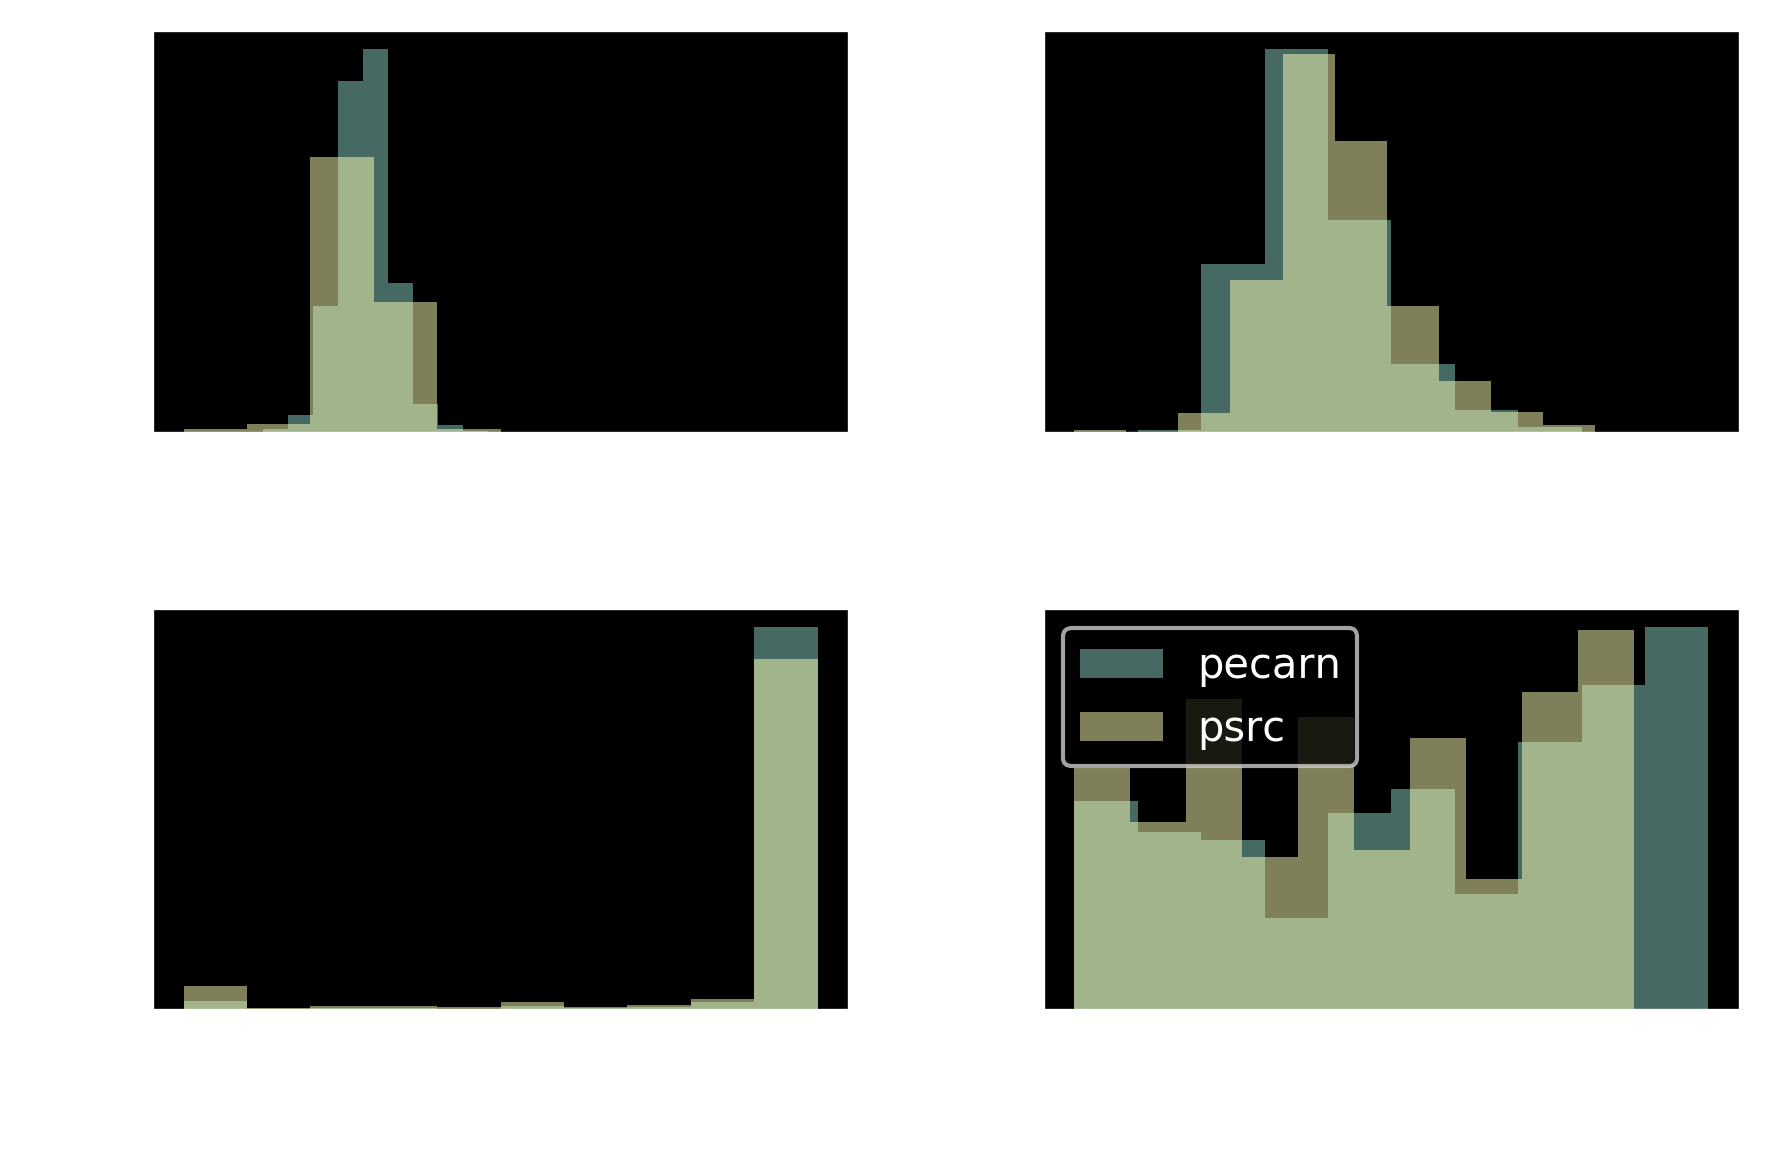

In [54]:
R, C, = 2, 2
feats = ['InitSysBPRange', 'InitHeartRate', 'GCSScore', 'Age']
plt.figure(dpi=300)
for i in range(R * C):
    plt.subplot(R, C, i + 1)
    feat = feats[i]
    plt.hist(df_pecarn[feat], density=True, alpha=0.5, label='pecarn')
    plt.hist(df_psrc[feat], density=True, alpha=0.5, label='psrc')
    plt.xlabel(feat)
plt.legend()
plt.tight_layout()
plt.show()

**number missing?**

# write csvs

In [23]:
df_pecarn.astype('object').describe().transpose().to_csv('processed/pecarn_vars.csv')
df_psrc.astype('object').describe().transpose().to_csv('processed/psrc_vars.csv')

In [117]:
common_feats = [x for x in feat_names_pecarn if x in feat_names_psrc]

In [17]:
df_psrc['Emesis post injury'].unique()

array([ 0., nan,  1.])